# Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from glob import glob
import zipfile as zf

import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

from skimage.io import imread, imshow

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import MaxPooling2D, Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19

import warnings
warnings.filterwarnings('ignore')

# Load Data


In [ ]:
!wget https://storage.googleapis.com/final_amt/archive.zip
# this code can be used when the dataset is uploaded on a cloud

--2023-01-16 10:10:40--  https://storage.googleapis.com/final_amt/archive.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447914276 (427M) [application/zip]
Saving to: ‘archive.zip.1’

archive.zip.1       100%[===================>] 427.16M  40.4MB/s    in 11s     

2023-01-16 10:10:52 (37.7 MB/s) - ‘archive.zip.1’ saved [447914276/447914276]



In [ ]:
# This code is used to extract the contents of a zip file into the notebook
dataset = zf.ZipFile(f'archive.zip', 'r')
dataset.extractall()
dataset.close()

### Let us view some of the images of Organic type

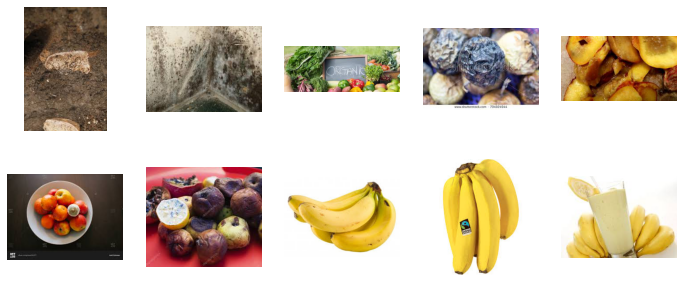

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10005.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10013.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_1014.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10258.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10297.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10379.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10426.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10616.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10680.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/O/O_10895.jpg")
plt.imshow(img)



### Let us view some of the images of Recycle type

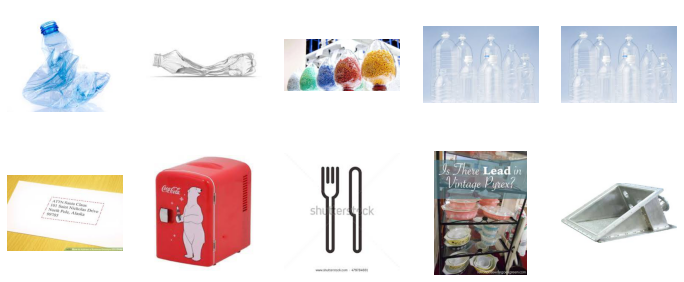

In [ ]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_25.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_800.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1004.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_6783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_1783.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_8589.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_9000.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/DATASET/TRAIN/R/R_5000.jpg")
plt.imshow(img)

# Data Augmentation

Data augmentation in image classification models is a way to create more images by making small changes to the existing images, such as flipping, rotating or cropping them. This helps the model to become better at recognizing the same object in different positions or orientations. The goal of data augmentation is to make the model more robust and able to classify new images that it hasn't seen before. In simple terms, it's a way to create more examples for the model to learn from, and make the model better at recognizing the objects it is supposed to classify.


In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1.0 / 255.0)



In [ ]:

# Flow training images in batches of 45 using train_datagen generator

train_dataset  = train_datagen.flow_from_directory(directory = '/content/DATASET/TRAIN',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 45, 
                                                   subset = 'training')

# Flow validation images in batches of 45 using valid_datagen generator

validation_dataset = valid_datagen.flow_from_directory(directory = '/content/DATASET/TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 45, 
                                                  subset = 'validation')

# Flow test images in batches of 45 using test_datagen generator

test_dataset = test_datagen.flow_from_directory(directory = '/content/DATASET/TEST',
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 45)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Model Building, Formation of CNN

 ### Initializing CNN & add a convolutional layer

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(224,224,3)))

# Padding helps the model to see more of the image
# Kernel size controls how much context the model can see
# Activation allows the network to recognize patterns and identify objects in the image

### Pooling operation

The pooling layer is used to reduce the dimensions of the feature maps. Thus, the Pooling layer reduces the number of parameters to learn and reduces computation in the neural network.

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

### Add two convolutional Layer

(are not mandatory, same layer with different filter size)

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# modified the 2nd and 3rd convolutional layers with filter numbers 32 & 64 respectively

### Flattening Operation


Flattening operation is converting the dataset into a 1-D array for input into the next layer which is the fully connected layer.



In [ ]:
model.add(Flatten())

### Fully Connected layer and output layer

The dense class in image classification is a step in a neural network that connects all the parts of the image to make a final decision about what the image shows. 

In [ ]:
model.add(Dense(units=512,activation="relu"))

model.add(Dense(units=256,activation="relu"))

model.add(Dense(units=1,activation='sigmoid'))

# Training and evaluation of the Convolutional neural network

## Model Summary

**“Output Shape”** = Each layer has an output and its shape is shown in the column. Each layer's output becomes the input for the subsequent layer.

**“Param #”**  = shows the number of parameters that are trained for each layer

In [ ]:
#The following is the model summary of the model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

## Specifying the optimizers and compile the model

In [ ]:
monitor = EarlyStopping(monitor='val_auc', patience=2, 
                        verbose=1, mode='max',restore_best_weights=True)
# defining callbacks

filepath = './best_weights.hdf5'
checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [monitor, checkpoint]

**Optimizer** = improves the accuracy of image classification by adjusting the model's parameters. 

In [ ]:
# compile model
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.AUC(name = 'auc')])

**categorical_crossentropy**  = a loss function that is used in the classification task. Loss is a very good measure of how distinguishable two discrete probability distributions are from each other.

**adam Optimizer** = updates neural network weights and learning rate. Optimizers are used to solve optimization problems by minimizing the function.

**accuracy** =  evaluates the performance of the Convolutional neural network algorithm.

## Model Fitting

In [ ]:
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=10,
                              verbose=1, callbacks=callback_list)

Epoch 1/10
402/402 [==============================] - ETA: 0s - loss: 0.6576 - auc: 0.8420
Epoch 1: val_auc improved from -inf to 0.88962, saving model to ./best_weights.hdf5
402/402 [==============================] - 232s 553ms/step - loss: 0.6576 - auc: 0.8420 - val_loss: 0.4595 - val_auc: 0.8896
Epoch 2/10
402/402 [==============================] - ETA: 0s - loss: 0.4170 - auc: 0.8905
Epoch 2: val_auc did not improve from 0.88962
402/402 [==============================] - 220s 546ms/step - loss: 0.4170 - auc: 0.8905 - val_loss: 0.4571 - val_auc: 0.8776
Epoch 3/10
402/402 [==============================] - ETA: 0s - loss: 0.3980 - auc: 0.9029
Epoch 3: val_auc improved from 0.88962 to 0.91122, saving model to ./best_weights.hdf5
402/402 [==============================] - 205s 509ms/step - loss: 0.3980 - auc: 0.9029 - val_loss: 0.3897 - val_auc: 0.9112
Epoch 4/10
402/402 [==============================] - ETA: 0s - loss: 0.3822 - auc: 0.9095
Epoch 4: val_auc improved from 0.91122 to 0.

The model stops at epoch 10 and reaches its maximum accuracy at 92.9%.

## Model Evaluation

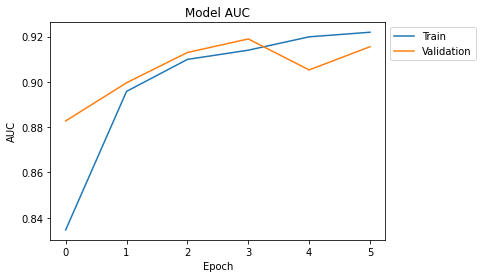

In [ ]:
# plotting model auc

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**"accuracy"** = the ratio between correct predictions and the total number of predictions in the training data. The higher, the better. This is normally inversely correlated with the loss

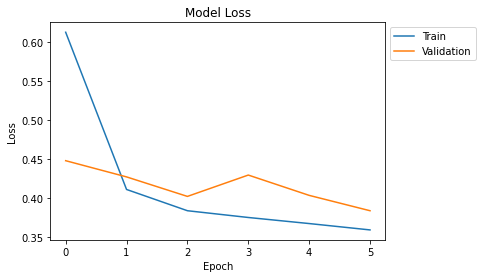

In [ ]:
# plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**"loss"** = the loss value over the training data after each epoch. This is what the optimization process is trying to minimize with the training. The lower, the better

In [ ]:
# Evaluating Loss and AUC for Test data 

model.evaluate(test_dataset)

56/56 [==============================] - 5s 94ms/step - loss: 0.3565 - auc: 0.9500


[0.3564847409725189, 0.9500026702880859]

# Test the model

1/1 [==============================] - 0s 20ms/step
The image belongs to Organic waste category 


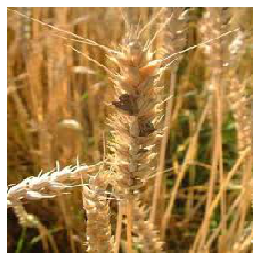

In [ ]:
# Test - ORGANIC

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img("/content/DATASET/TRAIN/O/O_10004.jpg", target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)


if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")

1/1 [==============================] - 0s 24ms/step
The image belongs to Recycle waste category


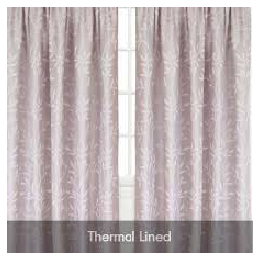

In [ ]:
# Test - RECYCLE

test_dict = test_dataset.class_indices
idc = {k:v for v,k in test_dict.items()}

img = load_img('/content/DATASET/TEST/R/R_10002.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")